# CS 237 Fall 2020   Homework Seven 


### Due date: Due Friday March 27th at Midnight in Gradescope with 12 hour grace period (til noon on Saturday)

### Late deadline:  If submitted up to 24 hours late, you will receive a 10% penalty (with same 12 hour grace period, i.e., you can submit for credit up to Sunday noon). 

### General Instructions

Please complete this notebook by filling in solutions where indicated. Be sure to "Run All" from the Cell menu before submitting. 



In [53]:
# Here are some imports which will be used in code that we write for CS 237

import matplotlib.pyplot as plt   # normal plotting
import numpy as np

from math import log, pi, log, floor, ceil       # import whatever you want from math
from random import seed, random
from collections import Counter

%matplotlib inline

from scipy.special import comb
           
def C(N,K):    
    return comb(N,K,True)     # just a wrapper around the scipy function


# Here are the basic statistical functions we will use from numpy

from numpy import mean, var, std, median

L = [2,4,3,6,4,5]

# mean value

mean(L)          


# Variance
#  ddof = delta degrees of freedom, default is 0

# population variance
var(L)      

# sample variance
var(L,ddof=1)

# Standard deviation
#  ddof = delta degrees of freedom, default is 0

# population standard deviation
std(L)      

# sample standard deviation
std(L,ddof=1)  

# Median

median(L)  

# Random sampling of `size` elements from list with or without replacement

np.random.choice(L,size=1,replace=True)
       
# Scipy statistical functions

from scipy.stats import norm, binom, expon, bernoulli                 

# https://docs.scipy.org/doc/scipy/reference/stats.html

#### Normal Distribution    #####

######   Note that in this library loc = mean and scale = standard deviation  #####

# Examples assume random variable X (e.g., housing prices) normally distributed with  mu = 60, sigma = 10

# Probability Density Function    (really only useful for drawing the curve)
#  f(x) = P(X == x)

norm.pdf(x=50,loc=60, scale= 10)     

# Cumulative Density Function
#  F(x) = P(X < x)

# Example:  Percentage of houses less than 50K. 
norm.cdf(x=50,loc=60,scale=10) 

# Example:  Find P(60<X<80)
norm.cdf(x=80,loc=60,scale=40) - norm.cdf(x=60,loc=60,scale=40)

# Survival Function: Simply 1 - CDF, i.e., P(X > x)

# Example:  Percentage of houses more than 50K.
norm.sf(x=50,loc=60,scale=10) 

# Percentage Point Function: Inverse of the CDF:
# For what is the largest value of k for which P( X < k ) = q  ?

# Example: What is the maximum cost of the 5% cheapest houses, 
# i.e., the x such that P(X < x) = 0.05?

norm.ppf(q=0.05,loc=60,scale=40)


# Inverse Survival Function: Inverse (1 - CDF):
# For what is the smallest value of k for which P( X > k ) = q  ?

# Example: What is the minimum cost of the 5% most expensive houses, 
# i.e., the x such that P(X > x) = 0.05?

norm.isf(q=0.05,loc=60,scale=40)

#   Give the endpoints of the interval (centered on the mean)
#   which contain alpha/100 percent of the population (alpha is a probability)

# Ex. Give the interval for the middle 75% of the houses

norm.interval(alpha=0.75, loc=60, scale=40)

# generate a random variate
norm.rvs(loc=60, scale=40)

# generate random variates, returns list of length = size
norm.rvs(loc=60, scale=40, size=10)




#####   Exponential Distribution     ########

#####  loc = minimum value (leave at 0 always)               ##### 
#####  scale = mean = 1 / lambda (using textbook notation)   #####

# Probability Density Function  f(x)       (Only useful for graphing and showing shape)

lam = 4
expon.pdf(x=5,loc=0, scale=1/lam)        # Must use 'scale = 1/lambda' to be consistent with textbook and lecture  

# Cumulative Density Function
#  F(x) = P(X < x)

expon.cdf(x=5,loc=0,scale=1/lam) 

# Example:  Find P(6<X<8)
expon.cdf(x=8,loc=0,scale=1/lam) - norm.cdf(x=6,loc=0,scale=1/lam)

# Percentage Point Function: Inverse of the CDF:
# For which value of x does P( X < x ) = q  ?

expon.ppf(q=0.05,loc=0,scale=1/lam)

# Survival Function: Simply 1 - CDF, i.e., P(X > x)

norm.sf(x=5,loc=0,scale=1/lam) 

# Inverse Survival Function: Inverse (1 - CDF):
# For what is the value of k for which P( X > k ) = q  ?

norm.isf(q=0.05,loc=0,scale=1/lam)

#g. generate a random variate
expon.rvs(loc=0, scale=1/lam)

#h. generate random variates, returns list of length = size
expon.rvs(loc=0, scale=1/lam, size=10)


##### Bernoulli Distribution  X ~ Bernoulli(p)  ####

#  p = probability of success for Bernoulli trial

# Generate a random variate
bernoulli.rvs(p=0.5)

# Generate a list of random variates
bernoulli.rvs(p=0.5,size=100)

##### Binomial Distribution  X ~ B(n,p)  ####

#  n = number of independent Bernoulli trials
#  p = probability of success for Bernoulli trial
#  k = outcome in range [0 .. n]

# Generate a random variate
binom.rvs(n=10, p=0.5)

# Generate a list of random variates
binom.rvs(n=10, p=0.5,size=100)

# Probability mass function.
binom.pmf(k=4, n=10, p=0.5)

# Cumulative distribution function
binom.cdf(k=4, n=10, p=0.5)

print()

## Problem One

Let $X = \text{Uniform}(0,1)$ (e.g., as produced by `np.random.random()`), and let

$$S_{10}= X_1+ \ldots + X_{10}$$ 

(A) Find the upper-bound for the probability $P( S_{10} \ge 7)$ using the Markov Inequality.

(B) Determine the same upper-bound using the Chebyshev Inequality. To apply the result you will need to subtract the mean from both sides of the inequality, as in Example 6.21 of your textbook (this example shows the typical way these problems are solved). 

(C) Determine the same probability using the Central Limit Theorem. (This is not strictly speaking an upper-bound, but rather an estimate, but the calculation should be clear.)

(D) Run an experiment in which you perform at least $10^6$ trials to find $P( S_{10} \ge 7)$, and compare this experimental result with your results for (A) -- (C). Which theoretical result was closest with your experimental result (which we assume is approximately correct)?


## SOLUTION
<p>(A)</p>
<p>E(S10) = E(X1) + E(X2) + ... + E(X10)</p>
<p>E(S10) = 10 * 1/2 = 5</p>
<p>Using the Markov Inequality, the upper-bound for the probability(S >= 10) should be 5/7 = $\boxed{0.7143}$.</p>
<p>(B)</p>
<p>Var(S10) = Var(X1) + ... + Var(X10) where they all have the same value.</p>
<p>Var(X) = E(X^2) - E(X)^2</p>
<p>E(X^2) = integral of x2 from 0 to 1 = 1/3</p>
<p>E(X)^2 = 1/4</p>
<p>Var(X) = 1/3 - 1/4 = 1/12. Therefore, Var(S10) = 10/12</p>
<p>Using the Chebyshev Inequality, $P(|S10 - 5| \ge 2) \le \frac{10}{12*4} = \boxed{0.2083}$ </p>
<p>(C) </p>
<p>From what we have observed so far, we know that the new mean is 5, and new variance is 10/12. Therefore, we can also get the new standard deviation by taking the square root of 10/12. </p>

In [54]:
answer1c = 1 - norm.cdf(x=7,loc=5,scale=np.sqrt(10/12))
print("(C): " + str(np.around(answer1c,4)))

(C): 0.0142


<p>(D)</p>
<p>As you can see from the below, we get around 0.0135 after 10**6 trials. This is closest to what we got from C.</p>

In [55]:
num_trials = 10**6
count = 0
for i in range(num_trials):
    s10 = 0
    for x in range(10):
        s10 += np.random.random()
    if s10>=7:
        count += 1
prob = count/num_trials
print("(D): " + str(np.around(prob,4)))

(D): 0.0134


## Problem Two

(Continuous Distributions)  Let X be a continuous random variable with a frequency distribution (PMF) of the form 

$$ f(x) =
\begin{cases}
    {\large\frac{x}{4}} & \text{if $1\le x\le 3$} \\[4pt]
    \,0 & \text{otherwise} \\
\end{cases}$$
  
which can be graphed as follows:

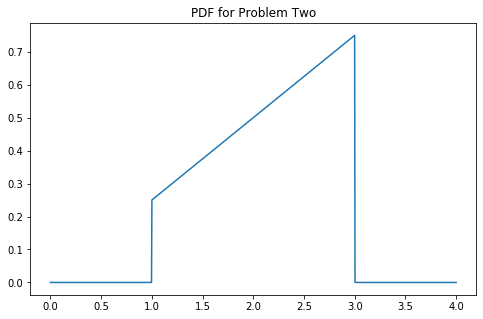

In [56]:
plt.figure(figsize=(8, 5))
plt.title("PDF for Problem Two")
X = np.linspace(0,4,1000)
plt.plot(X,[x/4 if 1 <= x <= 3 else 0 for x in X])
plt.show()

  (A) Determine the formula  for the CDF $F_X$ using geometrical techniques (i.e., not using integrals, but considering what happens to the area to the left of a point $a$ by considering the area of geometrical shapes)
  
  (B) Determine the formula  for the CDF $F_X(x)$ using an integral. 
  
  (C) Plot the CDF $F_X(x)$ (using the code above as a model).
  
  (D) Find $P(X\ge 2)$ 
  
  (E) Find $E(X)$ 
  
For (D) -- (E) you must use mathematical techniques and not just calculate it using iterative techniques in Python code. You may use Python to calculate results of mathematical formulae. 

## SOLUTION
<p>(A)</p>
<p>We can say that for a that is $1\le a\le 3$, the area to the left of a point 'a' could be calculated by adding two shapes: a rectangle and a triangle. A rectange: base = a-1, height = 1/4. A triangle: base = a-1, height = (a-1)/4</p>
<p>Hence, adding these two shapes together, we get (a-1)/4 + (a-1)^2/8 = $\boxed{\frac{a^2-1}{8}}$</p>
<p>(B)</p>
<p>$\int{\frac{x}{4}dx} = \frac{x^2}{8} + C$</p>
<p>C = -1/8</p>
<p>
    $$ F(x) =
\begin{cases}
    0 & \text{if $x\le 1$}\\
    \large\frac{x^2-1}{8} & \text{if $1\le x\le 3$} \\[4pt]
    \,1 & \text{otherwise} \\
\end{cases}$$


</p>
<p>(C)</p>

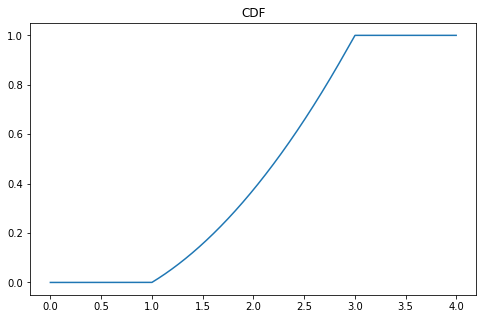

In [57]:
plt.figure(figsize=(8, 5))
plt.title("CDF")
plt.plot(np.arange(0,4,0.001),[0 if x <= 1 else (x**2-1)/8 if 1 <= x <= 3 else 1 for x in np.arange(0,4,0.001)])
plt.show()

<p>(D)</p>
<p>Simply find the area under the curve from 2 to 3. That is, 9/8 - 4/8 = 5/8 = $\boxed{0.625}$</p>
<p>(E)</p>
<p>Integral of x*x/4 from 1 to 3.</p>
<p>= x^3/12 from 1 to 3</p>
<p>= 27/12 - 1/12 = 13/6 = $\boxed{2.167}$</p>

## Problem Three

The time elapsed, in minutes, between the placement of an order for pizza and its delivery at a particular shop is a uniform RV, with the density function


$$\begin{equation}
    f(x) = \begin{cases}
               1/15               & \text{if } 25<x<40\\
               0         & \text{otherwise}
           \end{cases}
\end{equation}$$

(A) Determine the mean and standard deviation of the time it takes for the piazza shop to deliver pizza.

(B) Suppose that it takes 12 minutes to actually make the pizza after it is ordered. Determine the mean and standard deviation of the time it takes for the delivery person to deliver the pizza, given that the overall time is given as above. 

<p>(A)</p>
<p>E(X) = integral of x * 1/15 from 25 to 40</p>
<p>= x^2/30 from 25 to 40</p>
<p>= 1600/30 - 625/30 = 975/30 = $\boxed{32.5}$</p>
<p>standard deviation = squre root of (E(X^2) - E(X)^2)</p>
<p>E(X^2) = integral of x^2 * 1/15 from 25 to 40</p>
<p>= x^3/45 from 25 to 40</p>
<p>= 1075.</p>
<p>E(X)^2 = 32.5^2 = 1056.25</p>
<p>standard deviation = square root of (1075 - 1056.25) = $\boxed{4.33}$</p>
<p>(B)</p>
<p>Now, the range should be between 13 and 28.</p>
<p>E(X) = integral of x * 1/15 from 13 to 28</p>
<p>= x^2/30 from 13 to 28</p>
<p>= 784/30 - 169/30 = 615/30 = $\boxed{20.5}$</p>
<p>standard deviation = square root of (E(X^2) - E(X)^2)</p>
<p>E(X^2) = integral of x^2 * 1/15 from 13 to 28</p>
<p>= x^3/45 from 13 to 28</p>
<p>= 439</p>
<p>E(X)^2 = 20.5^2 = 420.25</p>
<p></p> standard deviation = square root of (439 - 420.25) = $\boxed{4.33}$

## Problem Four

The lifetime of a tire selected randomly from a used tire shop is $X \times 10^4$ miles (i.e., X returns the lifetime of the tire--in units of miles driven--divided by $10^4$), where $X$ is
a random variable with density function:

$$\begin{equation}
    f(x) = \begin{cases}
               2/x^2               & \text{if } 1<x<2\\
               0         & \text{otherwise}
           \end{cases}
\end{equation}$$
which is displayed below. 

(A) What percentage of the tires of this shop last less than 15,000 miles?

(B) Of the tires specified in (A), what percentage of *those* last between 10,000 and 12,500 miles?

Hint: You can use the Power Rule for integration for negative exponents except for the special case $x^{-1}$; (B) will involve a conditional probability. 

## SOLUTION
<p>(A)</p>
<p>The lifetime of a tire selected randomly from a used tire shop is X*10000. Since we have to find the percentage of the tires that is less than 15000 miles, $P(10000X \lt 15000) =  P(X \lt 1.5)$</p>
<p>$P(X \lt 1.5)$ = integral of 2/(x^2) from 1 to 1.5.</p>
<p>= -2 * 1/x from 1 to 1.5</p>
<p>= 2/3 = $\boxed{67 percent}$</p>
<p>(B)</p>
<p>Using conditional probability, the following question can be expressed as $P(10k \lt 10^4X \lt 12.5k | 10^4X \lt 15k)$</p>
<p>= $P(1 \lt X \lt 1.25 | X \lt 1.5)$</p>
<p>= integral of 2/(X^2) from 1 to 1.25 / integral of 2/(X^2) from 1 to 1.5</p>
<p>= 1/x from 1 to 1.25 / 1/x from 1 to 1.5</p>
<p>= 3/5 = $\boxed{60 percent}$</p>

# Scipy.stats 

For the following, use the statistical functions given at the top of this notebook. 

Also consider using the Distributions Notebook posted online to visualize these distributions (but use scipy.stats for the calculations). 

You are not required to do so, but a nice touch is to print out your answer in a code block, i.e., if
you were asked "What is the probability in the standard normal that a value occurs in the interval between
-0.94 and 1.2 standard deviations from 0," you could answer as follows:

In [58]:
mu = 0
sigma = 1
lo = -0.94
hi = 1.2

answer = norm.cdf(x=hi,loc=mu,scale=sigma) - norm.cdf(x=lo,loc=mu,scale=sigma)
print("Solution: " + str(np.around(answer,4)))

Solution: 0.7113


## Problem Five (Normal Distribution)

Suppose that in a population of individuals, their height is  normally distributed with a mean $\mu =68$ inches and a standard deviation of $\sigma=1.45$ inches. </p>

<p> (A) 
  What is the probability that a randomly-selected individual has a height less than 66 inches?</p>
  
<p>(B) What is the probability that a randomly-selected individual has a height more than 72 inches?</p>

<p>(C) What is the probability that a randomly-selected individual has a height between 66.5 and 71 inches?</p>

<p>(D) What is the maximum height for a person to be in the bottom 1% of the population in terms of height?</p>

<p>(E) To characterize the "middle 50%" of the population in terms of the standard deviation, give the value $k$ in this formula:
    
$$P( | X - \mu_X | < k\cdot\sigma_X ) = 0.5.$$

Note that this does not depend on the exact values for $\mu$ and $\sigma$ given in this problem.  
</p>

Hint: peruse the functions from the `norm` library given in the first code cell above. 
 

In [59]:
ans4a = norm.cdf(x=66,loc=68,scale=1.45)
print("(A) " + str(np.around(ans4a,4)))

(A) 0.0839


In [60]:
ans4b = 1.0 - norm.cdf(x=72, loc=68, scale=1.45)
print("(B) " + str(np.around(ans4b,4)))

(B) 0.0029


In [61]:
ans4c = norm.cdf(x=71,loc=68,scale=1.45) - norm.cdf(x=66.5,loc=68,scale=1.45)
print("(C) " + str(np.around(ans4c,4)))

(C) 0.8303


In [62]:
ans4d = norm.ppf(q=0.01,loc=68,scale=1.45)
print("(D) " + str(np.around(ans4d,4)))

(D) 64.6268


In [63]:
ans4e = norm.interval(alpha=0.5, loc=68, scale=1.45)
print("(E) " + str(np.around(ans4e,4)))

(E) [67.022 68.978]


## Problem Six (Truncated Normal Distribution)

The problem with grades is that they are usually normally distributed, but
of course grades can not be any real number, but have upper and lower bounds. Here is a chart of GPAs of 4897 students at a modern university currently on lockdown:

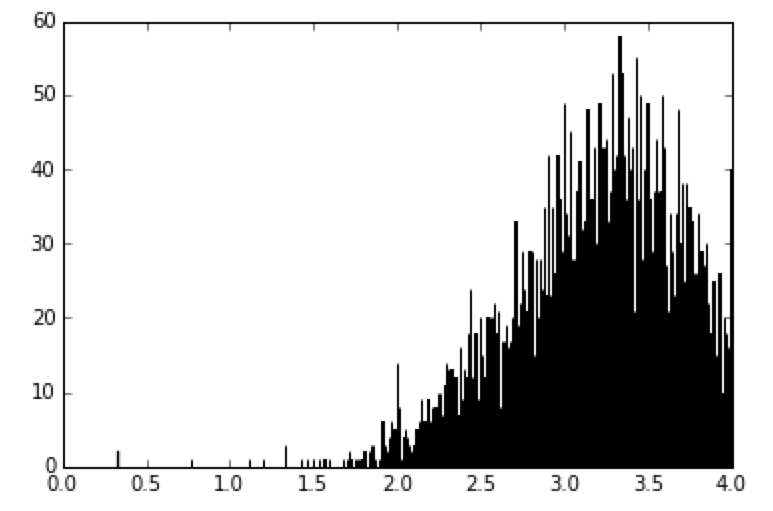

The problem with this, of course, is that a normal distribution seems to fit, but it is truncated at the highest value of 4.0.  How do we deal with this kind of distribution? Hm... it looks like we need to *condition* the problem so that we are only looking at that part of the distribution in the range [0..4], that is

$$P( \,\, \ldots X \ldots \,\,|\,\, 0\le X \le 4 \,\,)$$ 

(realistically you can ignore $X<0$). 

Let us suppose that a normal distribution with mean $mu=3.3$ and variance $\sigma^2=0.4$ describes the overall curve before it was truncated at 4.0 (and 0.0). 

Browse the functions from <code>scipy.stats.norm</code> given to see which one will solve each problem. 

(A) The BA/MS program requires a 3.0 GPA to apply. What percentage of this group
would be eligible to apply?

(B) Approximately how many students are below 2.0?  (Hint: I mean the actual number of students, not the percentage; figure out the percentage of the total, and round to the nearest integer). 

(C) Latin Honors at this school are calculated as follows:

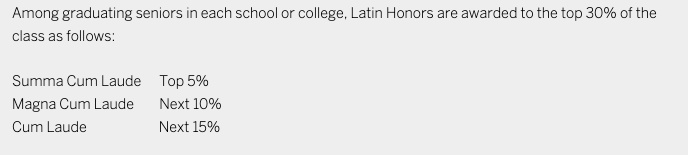

What are the GPA cutoffs for each of these honors?

Hint for (C):  You must reduce the percentages appropriately, since you are looking for
a percentage of the values below 4.0; you must also account for the percentages
above 4.0 when calculating.  

In [64]:
answer5a = (norm.cdf(x=4,loc=3.3,scale=np.sqrt(0.4)) - norm.cdf(x=3,loc=3.3,scale=np.sqrt(0.4))) / norm.cdf(x=4, loc=3.3, scale=np.sqrt(0.4))
print("(A): " + str(np.around(answer5a,4)))

(A): 0.6331


In [65]:
answer5b = norm.cdf(x=2, loc=3.3, scale=np.sqrt(0.4)) / norm.cdf(x=4, loc=3.3, scale=np.sqrt(0.4))
print("(B): " + str(np.around(4897 * answer5b)))

(B): 113.0


In [66]:
# P(k<X<4) = 0.05 * P(X<4)
summa_a = 0.05 * norm.cdf(x=4,loc=3.3,scale=np.sqrt(0.4))
summa_b = norm.sf(x=4,loc=3.3,scale=np.sqrt(0.4)) + summa_a
summa = norm.isf(q=summa_b,loc=3.3,scale=np.sqrt(0.4))

print("GPA cutoff for Summa Cum Laude: " + str(np.around(summa,4)))

magna_a = 0.15 * norm.cdf(x=4,loc=3.3,scale=np.sqrt(0.4))
magna_b = norm.sf(x=4,loc=3.3,scale=np.sqrt(0.4)) + magna_a
magna = norm.isf(magna_b,loc=3.3,scale=np.sqrt(0.4))

print("GPA cutoff for Magna Cum Laude: " + str(np.around(magna,4)))

cum_a = 0.3 *norm.cdf(x=4,loc=3.3,scale=np.sqrt(0.4))
cum_b = norm.sf(x=4,loc=3.3,scale=np.sqrt(0.4)) + cum_a
cum = norm.isf(cum_b,loc=3.3,scale=np.sqrt(0.4))

print("GPA cutoff for Cum Laude: " + str(np.around(cum,4)))


GPA cutoff for Summa Cum Laude: 3.885
GPA cutoff for Magna Cum Laude: 3.699
GPA cutoff for Cum Laude: 3.4702


 ## Problem Seven (Normal Distribution)
    
The lifetime of backup battery systems made by a 
Company A has a mean of
5 years and a standard deviation of 2 years. Those made by Company B
have a mean of 4 years and a standard deviation of 18 months. 
Suppose Wayne buys one backup system from Company A, and also one from
Company B.  The one from Company A lasts 4 years and 3 months, and the one
from Company B lasts 3 years and 9 months.  

Which of these backup battery systems performed relatively better, compared
with other systems from the same company? 

Hint: Standardize!


## SOLUTION
<p>Z1 = (Xi - mean)/sd</p>
<p>= (4.25 - 5)/2 = -0.375</p>
<p>Z2 = (Xi - mean)/sd</p>
<p>= (3.75 - 4)/1.5 = -0.17</p>
<p>Since Z2 is bigger than Z1, we can conclude that the battery from Company B performed relatively better than that of Company A.</p>

## Problem Eight (Combining Normal with Other Distributions)

Suppose that in the Men's Olympic Ski Team, the chest size measurements are normally distributed with a mean of 39.8 inches and a standard deviation of 2.05 inches.


(A) What the probability that of 20 randomly selected members of the team, at least 5 have a chest size of at least 41.7 inches?

(B) Supposing we choose men on the team repeatedly and with replacement, how many men would you expect to choose before finding a member with a chest measurement of less than 37 inches?

Hint: Let X is a normally distributed random variable according to the parameters given in the first sentence. Then consider Y and Z be appropriately distributed random variables for (A) and (B) respectively. 

In [67]:
p = norm.sf(x=41.7, loc=39.8, scale=2.05)

def binomial(x,N,p):
    sum = 0
    for i in range(x+1):
        sum += C(N,i)*(p**i)*((1-p)**(N-i))
    return sum

answer8a = 1 - binomial(5,20,p)
print("(A): " + str(np.around(answer8a,4)))

(A): 0.1276


In [68]:
p = norm.cdf(x=37, loc=39.8, scale=2.05)
answer8b = 1/p
print("(B): " + str(np.around(answer8b,4)))

(B): 11.6289


## Problem Nine (Normal Approximation to the Binomial)

This problem concerns the normal approximation to the binomial. The &quot;continuity correction&quot; (sometimes called Yates's Continuity Correction) is a technique I will show in the Tuesday 3/24 lecture for improving the accuracy of the normal approximation. 

In this problem we will measure the accuracy of the approximations by using
*absolute percentage error*, which is defined to be:

$$  \frac{\vert\,\text{measured value} - \text{actual value}\,\vert}{\text{actual value}}\times 100.$$

</p>
<p>(A) Suppose of all the kids that show up on Halloween night, 58% are dressed in Spiderman costumes. If 60 kids show up, what is the probability that <span>between 33 and 38</span> (inclusive) kids will be dressed in Spiderman costumes? (Use the binomial.)</p>
<p>(B) Repeat the previous question, but using the normal approximation to the binomial, without using the continuity correction, and express the accuracy of your approximation using the absolute percentage error.</p>
<p>(C) Repeat the previous question, but now using the continuity correction, again showing the accuracy using the absolute percentage error. </p>


In [69]:
#X~Binomial(60,0.58); P(33<X<38)
answer10a = binomial(38,60,0.58) - binomial(32,60,0.58)
print("(A): " + str(np.around(answer10a,4)))

(A): 0.5609


In [70]:
mean = 60*0.58
sigma = (60*0.58*(1-0.58))**0.5

answer10b = norm.cdf(x=38, loc=mean, scale=sigma) - norm.cdf(x=33,loc=mean,scale=sigma)
print("(B): " + str(np.around(answer10b,4)))
approx_b = (answer10a - answer10b)/answer10a * 100
print("The accuracy of approximation: " + str(np.around(approx_b,4)) + "%")

(B): 0.4798
The accuracy of approximation: 14.4532%


In [71]:
mean = 60*0.58
sigma = (60*0.58*(1-0.58))**0.5

answer10c = norm.cdf(x=38.5, loc=mean, scale=sigma) - norm.cdf(x=32.5,loc=mean,scale=sigma)
print("(C): " + str(np.around(answer10c,4)))
approx_c = (answer10a - answer10c)/answer10a * 100
print("The accuracy of approximation after using the continuity correction: " + str(np.around(approx_c,4)) + "%")

(C): 0.5597
The accuracy of approximation after using the continuity correction: 0.2107%


## Problem Ten (CLT)

<p>Suppose the heights of 3400 male students at a university are normally distributed with mean 68 inches and standard deviation 3 inches. That is, you have a random variable $X$ which uniformly at random chooses a male student and returns his height, where $E(X) = 68.0$ and $\sigma_X = 3.0$.</p>
<p>(A) Supposing sample groups of 25 men are taken from this population (with replacement)
    and the average height of the group calculated, i.e., you are investigating the random variable $\overline{X}_{25}$. What would be the expected value and standard deviation for $\overline{X}_{25}$.?</p>
<p>(b) Supposing we wanted to get more accuracy in our sampling procedure, so that we wanted the standard deviation of the result to be at most 0.25 inches. What is the smallest sample size we could use to insure this? (Formally, what is the smallest $n$ for which $\sigma_{\overline{X}_n} \le 0.25$?)</p>
<p>(c) Supposing you take 80 samples of size 25 (80 "pokes" of $\overline{X}_{25}$), in how many samples would you *expect* to find the output from $\overline{X}_{25}$ between 66.8 and 68.3 inches? </p>



## SOLUTION
<p>(A)</p>
<p>Using the central limit theorem, the expected value is still the same, which is $\boxed{E(X25) = 68.0}$. However, standard deviation should be divided by the square root of 25, which is 5. 3.0 / 5 = $\boxed{sd = 0.6}$</p>
<p>(B)</p>
<p>3.0 / square root of (N) = 0.25</p>
<p>3.0/0.25 = square root of N</p>
<p>N = 12**2 = $\boxed{144}$</p>

In [72]:
answer10c = norm.cdf(x=68.3,loc=68.0,scale=0.6) - norm.cdf(x=66.8,loc=68.0,scale=0.6)
print(answer10c)
print("(C): " + str(np.around(answer10c * 80)))

0.6687123293258326
(C): 53.0


## Problem Eleven -- Convergence of Mean of Fair Coin Flips  

Now we will return to the framework of plotting in 2D to create one of my favorite "data graphics," showing what happens when we repeatedly flip a fair coin and track the value of the mean number of flips.  .  

We have quantified how these converges by using the Central Limit Theorem, which enables us to quantify the standard deviation of the random variation in the mean after n flips. Essentially, we are dealing with a Bernoulli(00.5) population (the individual coin flips) and after n flips, we have essentially taken a sample of size n and calculated the mean. Therefore, you can calculate the standard deviation of the mean after n flips:

$${\sigma\over\sqrt(n)}$$

where $\sigma$ is the standard deviation of Bernoulli(0.5).  

To create the figure, do the following:

   - Complete the code template below for <code>generateMeans()</code>, which generates a sequence of `limit` = $10^3$ Bernoulli(0.5) trials and calculates a corresponding sequence of means up to that point, e.g., 
<pre>
    [1, 0,   0,      1,   1,   0,   1, ...  ]
    [1, 0.5, 0.33.., 0.5, 0.6, 0.5, 0.57... ]
</pre>

   - Create lists of length <code>limit</code> giving the bounds guaranteed by the CLT at each step (step n represents a sample of size n):<br>
     S1 = 0.5 + $\sigma \,/{\tiny\sqrt{n}}\,$  for each step n<br>
     S2 = 0.5 + $2\sigma \,/{\tiny\sqrt{n}}\,$ for each step n<br>
     S3 = 0.5 + $3\sigma \,/{\tiny\sqrt{n}}\,$ for each step n<br>
     S1n = 0.5 - $\sigma \,/{\tiny\sqrt{n}}\,$  for each step n<br>
     S2n = 0.5 - $2\sigma \,/{\tiny\sqrt{n}}\,$ for each step n<br>
     S3n = 0.5 - $3\sigma \,/{\tiny\sqrt{n}}\,$ for each step n<br>
         
   - Graph `num_trials` = 50 sequences of means by calling `generateMeans()` 50 times
   - Graph each of the 6 lists S1... S3n giving the bounds at each step.
   
Follow the diagram in the Central Limit Theorem notebook as closely as you can, but feel free to improve it!   If you draw all the curves before calling `show()`, they will all display on the same graph. 

Hint: To check your work, the first ten values of S1 should be close to the following:
<pre>
S1[:10] = [1.0, 0.8535533905932737, 0.7886751345948129, 0.75, 0.7236067977499789, 0.7041241452319316, 0.6889822365046137, 0.6767766952966369, 0.6666666666666666, 0.658113883008419]
</pre>

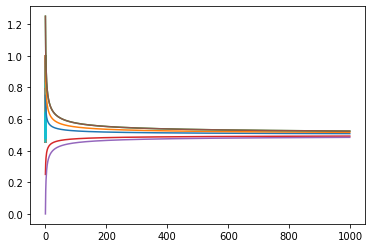

In [73]:
num_trials = 50
limit = 10**3
p=0.5
X = [bernoulli.rvs(0.5) for x in range(limit)]
Y = [0]*limit

def generateMeans():
    count = 0
    for i in range(limit):
        if X[i] == 1:
            count += 1
        Y[i] = count/(i+1)
        
    return Y     # your code here

S1 = [0.5 + 0.25/np.sqrt(x) for x in range(1,limit+1)]
S2 = [0.5 + 2*0.25/np.sqrt(x) for x in range(1,limit+1)]
S3 = [0.5 + 3*0.25/np.sqrt(x) for x in range(1,limit+1)]
S1n = [0.5 - 0.25/np.sqrt(x) for x in range(1,limit+1)]
S2n = [0.5 - 2*0.25/np.sqrt(x) for x in range(1,limit+1)]
S3n = [0.5 + 3*0.25/np.sqrt(x) for x in range(1,limit+1)]


# Your code here
for x in range(num_trials):
    plt.plot(X, generateMeans())

plt.plot(S1)
plt.plot(S2)
plt.plot(S3)
plt.plot(S1n)
plt.plot(S2n)
plt.plot(S3n)
    


## Generating Variates from a Continuous Distribution

Samples from a given distribution are often called "random variates" or just "variates" for short; to 
generate <i>size</i> random variates from a normal distribution with mean <i>loc</i> and standard 
deviation <i> scale </i> we can use the <code>scipy.stats</code> function 
<pre>
 X = norm.rvs(loc=0,scale=1,size=num_trials)
</pre>

(Note that in this case, the normal is defined in terms of the standard devation, and <i>not</i> the variance.)

Run the next cell several times to get a sense for how this function works

In [74]:
print("From N(0,1):")
X = norm.rvs()       # default is a standard normal with mean 0 and standard deviation 1
print(X)
print()
print("From N(10,2^2):")
X = norm.rvs(10,2)   # defined by mean and standard deviation (NOT the variance)
print(X)
print()
print("Ten  variates from N(66,3^2):")
X = norm.rvs(66,3,size=10)
print(X)


From N(0,1):
1.1880427903963544

From N(10,2^2):
10.948739183504886

Ten  variates from N(66,3^2):
[66.21065419 64.15719565 68.32430232 63.95057589 66.19466186 66.29655207
 63.83183657 67.22312943 64.96517624 68.4044309 ]


### Graphing Continuous Variates: A Problem
So generating normal variates is easy! What we are going to concern ourselves with in this next problem is now to graph a collection of such normal numbers. 

Here is the problem: since each value occurs (with high probability) only once, we can't just create a histogram and convert it into a frequency distribution. 

Here is what happens if we do this, and graph it as a scatter plot against the theoretical (continuous) distribution:

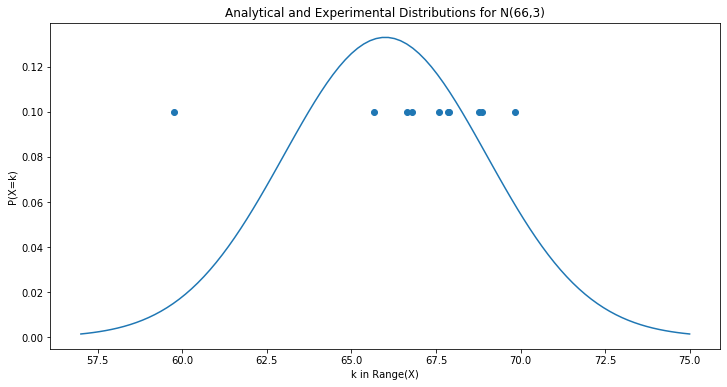

In [75]:
def display_normal_samples(mu,sigma,num_trials):
    fig, ax = plt.subplots(1,1,figsize=(12,6))
    plt.title('Analytical and Experimental Distributions for N('+str(mu)+','+str(sigma)+')')
    plt.ylabel("P(X=k)")
    plt.xlabel("k in Range(X)")
    # use normal(...) to generate random samples
    X = sorted(norm.rvs(mu,sigma,num_trials))
    # Now convert frequency counts into probabilities
    D = Counter( X )
    P = [D[k]/num_trials for k in X]
    plt.scatter(X,P)
    # Now generate the theoretical normal with the same mean and 
    X2 = np.linspace(mu-sigma*3,mu+sigma*3,100)
    Y = [norm.pdf(x,mu,sigma) for x in X2]
    plt.plot(X2,Y)
    plt.show()

# try setting the number of trials - the number of samples generated -- to 100 and 1000.
num_trials = 10
display_normal_samples(66,3,num_trials)




### Graphing Continuous Variates with Bins
You see the problem: since each floating point number (an approximation of a real number) is 
    generated with high probability at most once, we can't see the accumulation of samples that would
    indicate the probability.  
Essentially we are trying to create a frequency distribution from values whose theoretical probability is 0. What to do? 

  Well, you know that probabilities can only be calculated in continuous distributions using <i>intervals</i>, so we will create equally-sized intervals to collect together our samples from the continuous distribution. Then we must "slot" each variate into its appropriate bin and calculate the probabilities. 

Thus, we transform a continuous distribution into a discrete one for the purposes of visualizing it.    
    
    
The pyplot function hist(...) does the slotting, if we give it a list of outcomes and the bin boundaries, so
that really all we have to do is define the bins. 

### Graphing Normal Variates with Bins Calculated from Standard Deviation

For the normal distribution it makes sense to define the bin boundaries in terms of standard deviations from the mean, since we will be dealing with an unknown range of data; this bins can be made as wide or as narrow as we want, but will represent an interval defined in terms of the standard deviation sigma of the distribution. 

We will graph the distribution in a range of at least 4 standard deviations of the mean, ignoring the rare occurance of a variate outside this range. 

In [76]:
# Define the boundaries of bins with the specified width around the mean, 
# to plus/minus at least 4 * sigma

# bin_width is in units of sigma, so bin_width = 0.1 means sigma/10

def makeBins(mu,sigma,bin_width):
    numBins = ceil(4/bin_width)
    bins = [mu+sigma*bin_width*x for x in range(-numBins,numBins+1)]
    return bins

# Change the parameters several times to see the effect of this

print(makeBins(0,1,.5))
           

[-4.0, -3.5, -3.0, -2.5, -2.0, -1.5, -1.0, -0.5, 0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0]


## Problem Twelve: Generating and Graphing Normal Variates

### How does the number of trials affect the fit of the data to the normal distribution?
Now let's do our previous experiment but trying various 
values for `bin_width`...

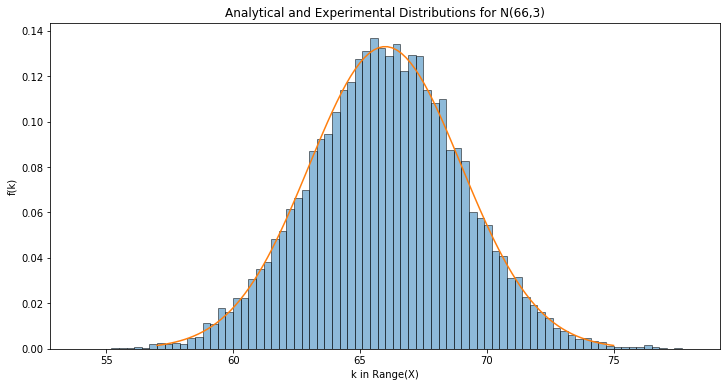

In [77]:
def display_normal_samples_binned(mu,sigma,num_trials,bin_widths):
    fig, ax = plt.subplots(1,1,figsize=(12,6))
    plt.title('Analytical and Experimental Distributions for N('+str(mu)+','+str(sigma)+')')
    plt.ylabel("f(k)")
    plt.xlabel("k in Range(X)")
    # use norm.rvs(...) to generate random samples
    X = norm.rvs(mu,sigma,num_trials)
    plt.hist(X,bins=makeBins(mu,sigma,bin_widths),density=True,edgecolor='k',alpha=0.5) # bins are of width 1/10**decimals
    #plt.hist(X,bins=makeBins(mu,sigma,bin_widths),density=True,edgecolor='k',alpha=0.5) # use if get warning
    # Now generate the theoretical normal with the same mean and 
    X2 = np.linspace(mu-sigma*3,mu+sigma*3,100)
    Y = [norm.pdf(x,mu,sigma) for x in X2]
    plt.plot(X2,Y)
    plt.show()
    
#try each of these and observe the effects

N = 10000     # try 100, 1000, and 1,000,000

display_normal_samples_binned(66,3,N,0.1)       
   

<b>Clearly the data seems to fit the normal better when the number of trials increases...</b>

### Affect of the bin width

But now let's think about the issue of precision, i.e., the width of the bins.
Again, try each of the following and see what happens. You can see that too-wide bins don't give much information, but too-narrow bins don't show how the data fits the normal distribution. There is a relationship between the number of data points and the width of the bins.

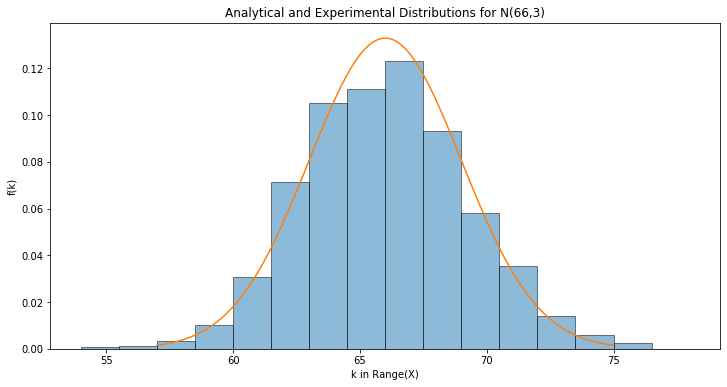

In [78]:
bin_width = 0.5       # try changing this to 0.5, 0.2, 0.1, 0.05, and 0.01

display_normal_samples_binned(66,3,1000,bin_width)

### For the following, we are looking for reasonable-looking graphs, play around with it and come up with something that looks good. There is not an absolutely correct answer for any of these. 

### Part (A)
Clearly the "fit" with the normal curve depends on the width of the bins!
For the following three examples, find a value for the indicated parameter which gives a good correspondence
between the normal curve and the data. 

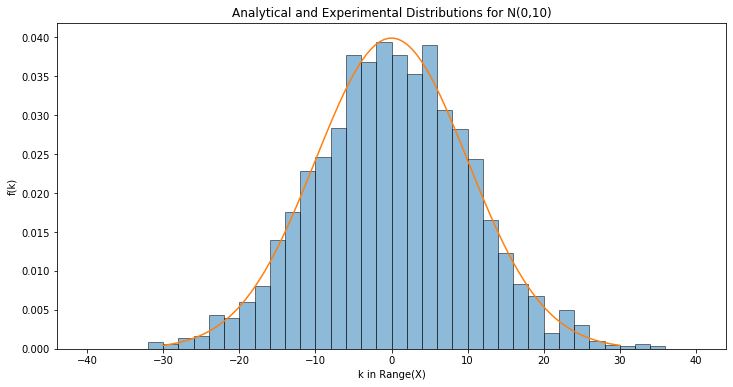

In [79]:
# Problem 1(a)
bin_width = 0.2 # experiment with this value 0.01, 0.05, 0.1, 0.15, etc. -- find the 
                   # largest number which still gives a good fit
    
display_normal_samples_binned(0,10,3000,bin_width)     # don't change this line

#SOLUTION: 0.2

### Part (B)

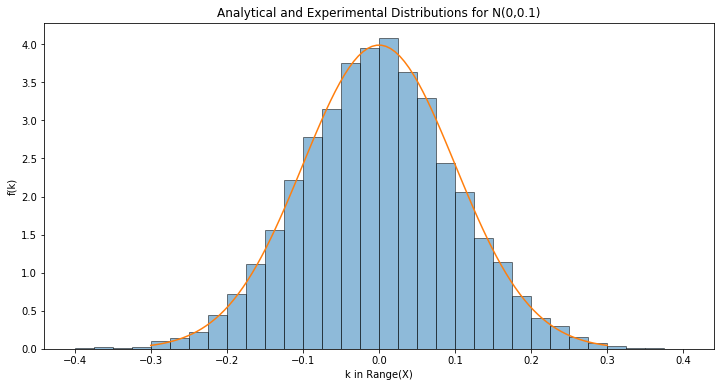

In [80]:
# Problem 1(b)

bin_width = 0.25     # experiment with this value -- find the largest number which still gives a good fit

display_normal_samples_binned(0,0.1,10000,bin_width)     # don't change this line

#SOLUTION: 0.25

### Part (C)

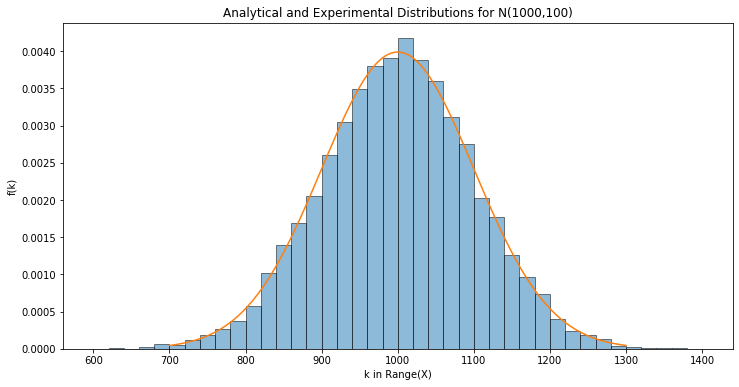

In [81]:
# Problem 11(c)

bin_width = 0.20    # experiment with this value -- find the largest number which still gives a good fit
display_normal_samples_binned(1000,100,10000,bin_width)     # don't change this line

#SOLUTION: 0.2

### Part (D)

What do you think is a good value for `bin_width` in general, assuming that `num_trials` is 
sufficient to give a reasonable approximation of the normal distribution?


## SOLUTION
<p>I think a good value for bin_width in general is about 0.1 to 0.2 assuming that num trials is sufficient.</p>